# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the miniproject, you will be able to :

* load and extract features of images using ImageDataGenerator

* build the convolutional neural networks

* use the pre-trained models using keras applications

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1259 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people do not correctly wear their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset:

- Without Mask/ With Mask/ Partial Mask

Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

## Grading = 10 Points

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, InputLayer, Conv1D, ReLU, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title Download the data
# !wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip -P "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/December 16, 2023/"
# !unzip -qq "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/December 16, 2023/MP2_FaceMask_Dataset.zip" -d "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/December 16, 2023/"
# print("Data Downloaded Successfuly!!")

### Import Required packages

In [3]:
import numpy as np
import PIL
from PIL import Image
from matplotlib import pyplot as plt
import glob, os
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv3D,Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from matplotlib import image
from matplotlib import pyplot

## Data Loading and preprocessing (2 points)

### Analyze the shape of images and distribution of classes

In [4]:
partial_mask_images=glob.glob("/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/December 16, 2023/MP2_FaceMask_Dataset/train/partial_mask/*")
print("partial_mask_images",len(partial_mask_images))
with_mask_images=glob.glob("/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/December 16, 2023/MP2_FaceMask_Dataset/train/with_mask/*")
print("with_mask_images",len(with_mask_images))
without_mask_images=glob.glob("/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/December 16, 2023/MP2_FaceMask_Dataset/train/without_mask/*")
print("without_mask_images",len(without_mask_images))

partial_mask_images 1294
with_mask_images 1624
without_mask_images 2138


In [5]:
data = image.imread(partial_mask_images[0])
# summarize shape of the pixel array
print("partial_mask_images[0]",data.dtype)
print("partial_mask_images[0]",data.shape)



data = image.imread(with_mask_images[0])
# summarize shape of the pixel array
print("with_mask_image_sample[0]",data.dtype)
print("with_mask_image_sample[0]",data.shape)


data = image.imread(without_mask_images[0])
# summarize shape of the pixel array
print("without_mask_image_sample[0]",data.dtype)
print("without_mask_image_sample[0]",data.shape)

plt.tight_layout()
pyplot.show()

partial_mask_images[0] uint8
partial_mask_images[0] (1024, 1024, 3)
with_mask_image_sample[0] uint8
with_mask_image_sample[0] (160, 160, 3)
without_mask_image_sample[0] uint8
without_mask_image_sample[0] (208, 165, 3)


<Figure size 640x480 with 0 Axes>

### Load the images using ImageDataGenerator

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://keras.io/api/preprocessing/image/)

In [6]:
TRAINING_DIR = "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/December 16, 2023/MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/December 16, 2023/MP2_FaceMask_Dataset/test/"

TEST_DIR="/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured"
TEST_PARTIAL_MASK_DIR = "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/partial_mask"
TEST_WITH_MASK_DIR = "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/with_mask"
TEST_WITHOUT_MASK_DIR = "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/without_mask"

KAGGLE_DIR='/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/kaggel'

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=50,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

validation_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=50,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=50,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

In [8]:
batch_size = 8
train_generator = train_datagen.flow_from_directory(
    directory=TRAINING_DIR,
    target_size=(512, 512),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = validation_datagen.flow_from_directory(
    directory=VALIDATION_DIR,
    target_size=(512, 512),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(512, 512),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)
# test_generator_partial_mask = test_datagen.flow_from_directory(
#     directory=TEST_PARTIAL_MASK_DIR,
#     target_size=(512, 512),
#     color_mode="rgb",
#     batch_size=1,
#     class_mode=None,
#     shuffle=False,
#     seed=42
# )

# test_generator_with_mask = test_datagen.flow_from_directory(
#     directory=TEST_WITH_MASK_DIR,
#     target_size=(512, 512),
#     color_mode="rgb",
#     batch_size=1,
#     class_mode=None,
#     shuffle=False,
#     seed=42
# )

# test_generator_without_mask = test_datagen.flow_from_directory(
#     directory=TEST_WITHOUT_MASK_DIR,
#     target_size=(512, 512),
#     color_mode="rgb",
#     batch_size=1,
#     class_mode=None,
#     shuffle=False,
#     seed=42
# )

Found 4025 images belonging to 3 classes.
Found 250 images belonging to 3 classes.
Found 3 images belonging to 4 classes.


In [9]:
test_datagen

### Visualize the sample images of each class using data generator

Hint: plt.subplot

partial_mask_images[0] uint8
partial_mask_images[0] (1024, 1024, 3)
with_mask_image_sample[0] uint8
with_mask_image_sample[0] (160, 160, 3)
without_mask_image_sample[0] uint8
without_mask_image_sample[0] (208, 165, 3)


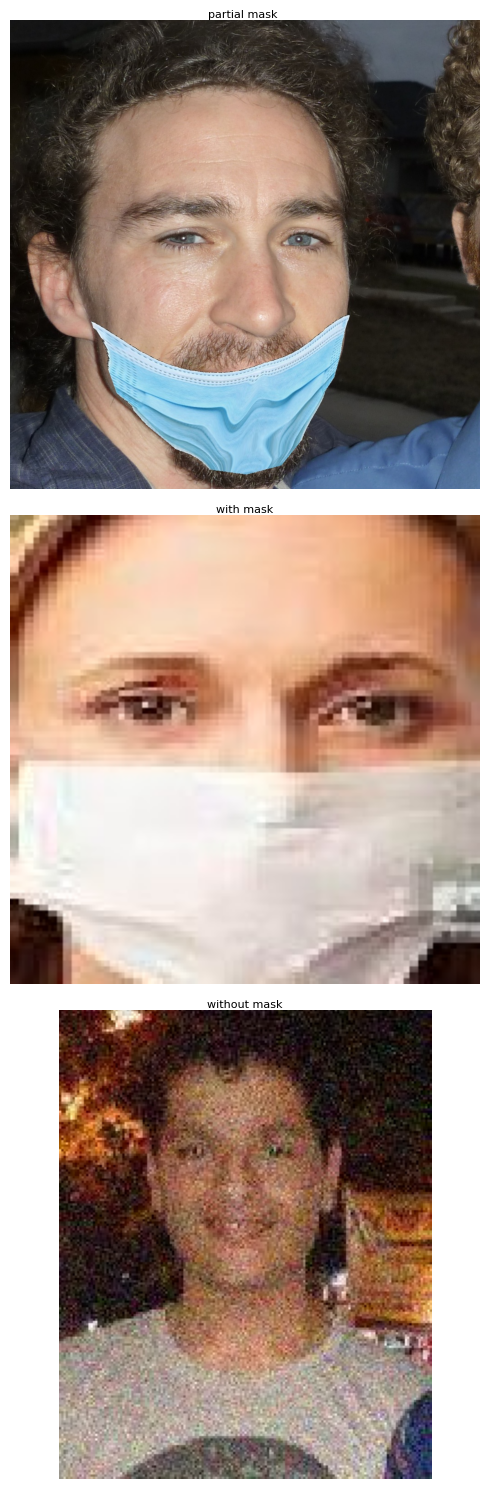

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
axes = axes.flatten()


partial_mask_image_sample = Image.open(partial_mask_images[0])
# summarize shape of the pixel array
axes[0].imshow(partial_mask_image_sample)  # You may adjust the colormap as needed
axes[0].axis('off')  # Turn off axis labels
axes[0].set_title("partial mask ", fontsize=8, pad=2)
data = image.imread(partial_mask_images[0])
# summarize shape of the pixel array
print("partial_mask_images[0]",data.dtype)
print("partial_mask_images[0]",data.shape)


with_mask_image_sample = Image.open(with_mask_images[0])
# summarize shape of the pixel array
axes[1].imshow(with_mask_image_sample)  # You may adjust the colormap as needed
axes[1].axis('off')  # Turn off axis labels
axes[1].set_title("with mask", fontsize=8, pad=2)
data = image.imread(with_mask_images[0])
# summarize shape of the pixel array
print("with_mask_image_sample[0]",data.dtype)
print("with_mask_image_sample[0]",data.shape)

without_mask_image_sample = Image.open(without_mask_images[0])
# summarize shape of the pixel array
axes[2].imshow(without_mask_image_sample)  # You may adjust the colormap as needed
axes[2].axis('off')  # Turn off axis labels
axes[2].set_title("without mask", fontsize=8, pad=2)
data = image.imread(without_mask_images[0])
# summarize shape of the pixel array
print("without_mask_image_sample[0]",data.dtype)
print("without_mask_image_sample[0]",data.shape)

plt.tight_layout()
pyplot.show()

## Build the CNN model using Keras (4 points)



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

In [11]:
import tensorflow as tf
from keras.models import load_model



In [12]:
os.path.exists('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/trained_models/my_model.h5')

True

In [13]:
# prompt: load keras model from file if its present otherwise initialise it
history=None
def getNewModel():
  model=Sequential([
                    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(512,512,3)),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
                    BatchNormalization(),
                    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
                    BatchNormalization(),
                    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                    Flatten(),
                    Dense(4096, activation='relu'),
                    Dropout(0.5),
                    Dense(4096, activation='relu'),
                    Dropout(0.5),
                    Dense(3, activation='softmax')
                    ])
  model.compile(loss = 'categorical_crossentropy', optimizer = tf.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])
  history = model.fit(train_generator, epochs = 1, validation_data = valid_generator)
  print(history)
  return model


model = load_model('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/trained_models/my_model.h5') if os.path.exists('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/trained_models/my_model.h5') else getNewModel()

In [12]:
# model = Sequential([
#                     Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(512,512,3)),
#                     BatchNormalization(),
#                     MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#                     Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#                     BatchNormalization(),
#                     MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#                     Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                     BatchNormalization(),
#                     Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                     BatchNormalization(),
#                     Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#                     BatchNormalization(),
#                     MaxPooling2D(pool_size=(3,3), strides=(2,2)),
#                     Flatten(),
#                     Dense(4096, activation='relu'),
#                     Dropout(0.5),
#                     Dense(4096, activation='relu'),
#                     Dropout(0.5),
#                     Dense(3, activation='softmax')
#                     ])

In [13]:
# model.compile(loss = 'categorical_crossentropy', optimizer = tf.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 96)      34944     
                                                                 
 batch_normalization (Batch  (None, 126, 126, 96)      384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 62, 62, 256)       1024      
 chNormalization)                                                
                                                        

In [15]:
# history = model.fit(train_generator, epochs = 1, validation_data = valid_generator)

504/504 [==============================] - 1328s 3s/step - loss: 0.7875 - accuracy: 0.8258 - val_loss: 0.5380 - val_accuracy: 0.8240


In [16]:
# prompt: save keras model to file

# model.save('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/trained_models/my_model.h5.v2/')


In [15]:
import pandas as pd

In [18]:
# history.history

{'loss': [0.7875475883483887],
 'accuracy': [0.8258385062217712],
 'val_loss': [0.5380200743675232],
 'val_accuracy': [0.8240000009536743]}

In [22]:
# history.history

{'loss': [0.7875475883483887],
 'accuracy': [0.8258385062217712],
 'val_loss': [0.5380200743675232],
 'val_accuracy': [0.8240000009536743]}

In [16]:
test_CNN_generator = test_datagen.flow_from_directory(
    directory=KAGGLE_DIR,
    target_size=(512, 512),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

y_predicted_CNN=model.predict(test_CNN_generator)
y_predicted_CNN

Found 660 images belonging to 2 classes.
660/660 [==============================] - 56s 82ms/step


array([[9.9994934e-01, 5.0103688e-05, 6.4433203e-07],
       [5.3245407e-01, 4.6530503e-01, 2.2409146e-03],
       [9.4821513e-01, 4.7994569e-02, 3.7902838e-03],
       ...,
       [9.9983513e-01, 2.9264947e-05, 1.3557187e-04],
       [1.6391692e-01, 3.2030527e-02, 8.0405253e-01],
       [6.9073845e-05, 1.1295613e-03, 9.9880135e-01]], dtype=float32)

In [ ]:
# @title Example form fields
# @markdown Forms support many types of fields.

no_type_checking = ''  # @param
string_type = 'example'  # @param {type: "string"}
slider_value = 142  # @param {type: "slider", min: 100, max: 200}
number = 102  # @param {type: "number"}
date = '2010-11-05'  # @param {type: "date"}
pick_me = "monday"  # @param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" # @param ["apples", "bananas", "oranges"] {allow-input: true}
# @markdown ---


In [18]:
class_names=['partial_mask','with_mask','without_mask']

In [19]:
import pandas as pd
# To get the predicted classes, you can use argmax
kaggle_predicted_CNN_classes = y_predicted_CNN.argmax(axis=1)


# kaggle_predicted_ResNet50_classes.filepaths

def kaggleClassNames(classidx):
  return class_names[classidx]

submission_CNN_classes=[kaggleClassNames(x) for x in kaggle_predicted_CNN_classes]

def getKaggleFilepath(full_path):
  file_paths=full_path.split('/')
  return file_paths[-2]+'/'+file_paths[-1]

submission_CNN_filepaths=[getKaggleFilepath(x) for x in test_CNN_generator.filepaths]


df=pd.DataFrame({'img_path': submission_CNN_filepaths, 'label': submission_CNN_classes})

df.to_csv('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/submissions/3.csv',index=False)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted_CNN)


# for index,record in enumerate(cm):
#   print(index,record)

sns.heatmap(cm, annot=True,  cmap='Blues', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Transfer learning (4 points)

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

In [8]:
from tensorflow.keras.optimizers import Adam

In [163]:
batch_size = 8
train_vgg16_generator = train_datagen.flow_from_directory(
    directory=TRAINING_DIR,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_vgg16_generator = validation_datagen.flow_from_directory(
    directory=VALIDATION_DIR,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)

# test_datagen = ImageDataGenerator(
#         rescale=1 / 255.0,
#         rotation_range=50,
#         zoom_range=0.05,
#         width_shift_range=0.05,
#         height_shift_range=0.05,
#         shear_range=0.05,
#         horizontal_flip=True,
#         fill_mode="nearest",
#         validation_split=0.20)



Found 4025 images belonging to 3 classes.
Found 250 images belonging to 3 classes.
Found 3 images belonging to 4 classes.


In [230]:
from keras.applications.vgg16 import VGG16
base_model=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# inp=Input(shape=(224,224,3))
# model_vgg16.add(VGG16(include_top=False,input_shape=(224,224,3)))
model_vgg16 = Sequential()

# Add the pre-trained VGG16 base model
model_vgg16.add(base_model)

# Flatten the output of VGG16
model_vgg16.add(Flatten())

# Add dense layers with dropout for regularization
# model_vgg16.add(Dense(256, activation='relu'))
# model_vgg16.add(Dropout(0.5))
# model_vgg16.add(Dense(128, activation='relu'))
# model_vgg16.add(Dropout(0.5))


###NEW LAYERS START
model_vgg16.add(Flatten())
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(Dropout(0.5))
# model_vgg16.add(Dense(3, activation='softmax'))

### NEW LAYERS END

# Output layer with softmax activation for three classes
num_classes = 3  # Adjust based on your number of classes
model_vgg16.add(Dense(num_classes, activation='softmax'))
# model_vgg16.summary()



In [231]:
model_vgg16.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [232]:
history_vgg16 = model_vgg16.fit(train_vgg16_generator, epochs = 1, validation_data = valid_vgg16_generator)

504/504 [==============================] - 3982s 8s/step - loss: 1.6958 - accuracy: 0.8398 - val_loss: 0.1307 - val_accuracy: 0.9360


In [233]:
model_vgg16.save('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/trained_models/model_vgg16.v3.keras/')

In [103]:
# len(test_vgg16_generator)

3

In [237]:
test_vgg16_generator = test_datagen.flow_from_directory(
    directory=KAGGLE_DIR,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=8,
    class_mode=None,
    shuffle=False,
    seed=42
)

y_predicted=model_vgg16.predict(test_vgg16_generator)
y_predicted

Found 660 images belonging to 2 classes.
83/83 [==============================] - 462s 6s/step


array([[9.4192201e-01, 5.7950381e-02, 1.2759891e-04],
       [8.5935640e-01, 1.3973713e-01, 9.0642722e-04],
       [9.9999994e-01, 1.5497291e-14, 4.0267516e-14],
       ...,
       [1.0000000e+00, 1.3976657e-17, 1.4554395e-17],
       [1.0000000e+00, 4.4917622e-11, 2.1635495e-10],
       [8.1326871e-06, 2.1526534e-02, 9.7846532e-01]], dtype=float32)

In [238]:
import pandas as pd
# To get the predicted classes, you can use argmax
kaggle_predicted_vgg16_classes = y_predicted.argmax(axis=1)


# kaggle_predicted_ResNet50_classes.filepaths

def kaggleClassNames(classidx):
  return class_names[classidx]

submission_vgg16_classes=[kaggleClassNames(x) for x in kaggle_predicted_vgg16_classes]

def getKaggleFilepath(full_path):
  file_paths=full_path.split('/')
  return file_paths[-2]+'/'+file_paths[-1]

submission_vgg16_filepaths=[getKaggleFilepath(x) for x in test_vgg16_generator.filepaths]


df=pd.DataFrame({'img_path': submission_vgg16_filepaths, 'label': submission_vgg16_classes})

df.to_csv('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/submissions/5.csv',index=False)

In [169]:
# To get the predicted classes, you can use argmax
predicted_classes = y_predicted.argmax(axis=1)


# To get the true labels from the validation generator
true_labels = test_vgg16_generator.classes

# Evaluate the accuracy
accuracy = ((predicted_classes+1) == true_labels).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [174]:
test_vgg16_generator.filepaths

['/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/partial_mask/photo.jpg',
 '/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/with_mask/photo.jpg',
 '/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/without_mask/photo.jpg']

In [170]:
predicted_classes+1

array([1, 2, 3])

In [171]:
true_labels

array([1, 2, 3], dtype=int32)

In [9]:
from keras.applications.resnet50 import ResNet50

In [29]:
from keras.applications.resnet50 import ResNet50

batch_size = 8
train_ResNet50_generator = train_datagen.flow_from_directory(
    directory=TRAINING_DIR,
    target_size=(312, 312),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_ResNet50_generator = validation_datagen.flow_from_directory(
    directory=VALIDATION_DIR,
    target_size=(312, 312),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)


base_model_ResNet50=ResNet50(weights='imagenet', include_top=False, input_shape=(312, 312, 3))
# Freeze the convolutional layers
for layer in base_model_ResNet50.layers:
    layer.trainable = False

# inp=Input(shape=(224,224,3))
# model_vgg16.add(VGG16(include_top=False,input_shape=(224,224,3)))
model_ResNet50 = Sequential()

# Add the pre-trained VGG16 base model
model_ResNet50.add(base_model_ResNet50)

# Flatten the output of VGG16
model_ResNet50.add(Flatten())

# Add dense layers with dropout for regularization
model_ResNet50.add(Dense(1024, activation='relu'))
model_ResNet50.add(Dropout(0.5))
model_ResNet50.add(Dense(512, activation='relu'))
model_ResNet50.add(Dropout(0.5))

# Output layer with softmax activation for three classes
num_classes = 3  # Adjust based on your number of classes
model_ResNet50.add(Dense(num_classes, activation='softmax'))


model_ResNet50.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history_ResNet50 = model_ResNet50.fit(train_ResNet50_generator, epochs = 10, validation_data = valid_ResNet50_generator)

model_ResNet50.save('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/trained_models/model_ResNet50.v5.keras/')
history_ResNet50

Found 4025 images belonging to 3 classes.
Found 250 images belonging to 3 classes.


ResourceExhaustedError: ignored

In [18]:
model_ResNet50 = load_model('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/trained_models/model_ResNet50.v2.keras/')

In [19]:
test_ResNet50_generator = test_datagen.flow_from_directory(
    directory=KAGGLE_DIR,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

y_predicted_ResNet50=model_ResNet50.predict(test_ResNet50_generator)
y_predicted_ResNet50

Found 660 images belonging to 2 classes.
660/660 [==============================] - 20s 29ms/step


array([[0.21247897, 0.31015727, 0.47736385],
       [0.21247897, 0.31015727, 0.47736385],
       [0.21247897, 0.31015727, 0.47736385],
       ...,
       [0.21247897, 0.31015727, 0.47736385],
       [0.21247897, 0.31015727, 0.47736385],
       [0.21247897, 0.31015727, 0.47736385]], dtype=float32)

In [13]:
class_names=['partial_mask','with_mask','without_mask']

In [20]:
import pandas as pd
# To get the predicted classes, you can use argmax
kaggle_predicted_ResNet50_classes = y_predicted_ResNet50.argmax(axis=1)


# kaggle_predicted_ResNet50_classes.filepaths

def kaggleClassNames(classidx):
  return class_names[classidx]

submission_ResNet50_classes=[kaggleClassNames(x) for x in kaggle_predicted_ResNet50_classes]

def getKaggleFilepath(full_path):
  file_paths=full_path.split('/')
  return file_paths[-2]+'/'+file_paths[-1]

submission_ResNet50_filepaths=[getKaggleFilepath(x) for x in test_ResNet50_generator.filepaths]


df=pd.DataFrame({'img_path': submission_ResNet50_filepaths, 'label': submission_ResNet50_classes})

df.to_csv('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/submissions/7.csv',index=False)

### Capture the live image using the below code cell and predict

In [175]:
class_names=['partial_mask','with_mask','without_mask']

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/photo.jpg


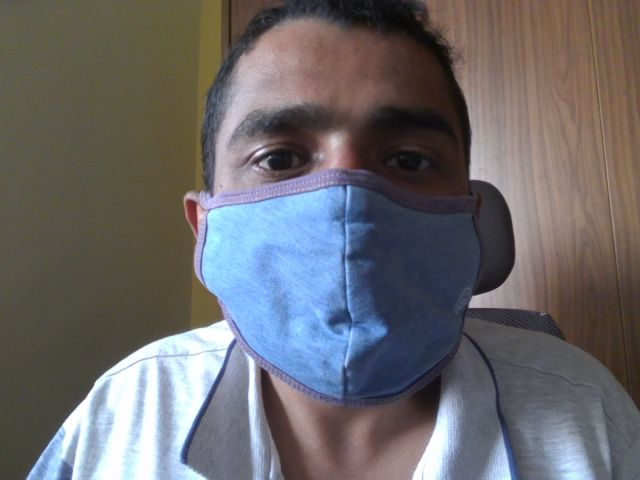

In [118]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which the model accepts.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

In [33]:
# batch_size = 8
# test_generator = test_datagen.flow_from_directory(
#     directory=/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/with_mask/',
#     target_size=(100, 100),
#     color_mode="rgb",
#     batch_size=1,
#     class_mode=None,
#     shuffle=False,
#     seed=42
# )

Found 0 images belonging to 0 classes.


In [ ]:
# features = PIL.Image.open("/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/with_mask/photo.jpg")
# plt.imshow(features);
# # YOUR CODE HERE to predict the image

# model.predict(test_generator)

### Instructions for preparing Kaggle competition predictions

Important: Refer the [Kaggle Team Creation Instructions Doc](https://drive.google.com/file/d/1SsnfllwfdNmsnp_a2K35F12_NJAVgTWz/view?usp=drive_link)

* Load the image paths from Kaggle testset using `glob`
* Read the Images using `PIL.Image.open` and resize to required shape.
* Get the predictions using trained model and prepare a csv file
  - FC layer of DeepNet model gives output for each class, consider the maximum value among all classes as prediction using `np.argmax`.
* Predictions (csv) file should contain 2 columns as Sample_Submission.csv
  - First column is the img_path which is considered as index
  - Second column is prediction in decoded form (for eg. with_mask, partial_mask, without_mask).
  - Note that at the time of submission to Kaggle, predictions need to be sorted in ascending order i.e, same as sample submission file.

<font color='magenta'>If you are unable to download the data and sample submission from the Kaggle Competition site then please use the download cell below.</font>


In [173]:
#@title Download test data and SampleSubmission file for Kaggle submission
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/FaceMask_Kaggle_test.zip -P "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/kaggel/"
!unzip -qq /content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/kaggel/FaceMask_Kaggle_test.zip -d /content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/kaggel/
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Sample_Submission.csv -P "/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/kaggel"
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


In [176]:
KAGGLE_DIR='/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/kaggel'

In [178]:
# test_datagen = ImageDataGenerator(
#         rescale=1 / 255.0,
#         rotation_range=50,
#         zoom_range=0.05,
#         width_shift_range=0.05,
#         height_shift_range=0.05,
#         shear_range=0.05,
#         horizontal_flip=True,
#         fill_mode="nearest",
#         validation_split=0.20)

kaggle_vgg16_generator = test_datagen.flow_from_directory(
    directory=KAGGLE_DIR,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=8,
    class_mode=None,
    shuffle=False,
    seed=42
)

y_predicted_kaggle=model_vgg16.predict(kaggle_vgg16_generator)
y_predicted_kaggle

Found 660 images belonging to 2 classes.
660/660 [==============================] - 464s 704ms/step


array([[9.3915850e-01, 2.8801022e-02, 3.2040492e-02],
       [9.2002416e-01, 2.9322160e-02, 5.0653748e-02],
       [9.9914539e-01, 2.9648931e-04, 5.5818353e-04],
       ...,
       [9.9999285e-01, 1.9740728e-06, 5.1246247e-06],
       [9.8489398e-01, 2.5936498e-03, 1.2512396e-02],
       [2.2545316e-04, 2.3396860e-03, 9.9743491e-01]], dtype=float32)

In [179]:
# To get the predicted classes, you can use argmax
kaggle_predicted_classes = y_predicted_kaggle.argmax(axis=1)


# To get the true labels from the validation generator
kaggle_predicted_classes.filepaths

['/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/partial_mask/photo.jpg',
 '/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/with_mask/photo.jpg',
 '/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/captured/without_mask/photo.jpg']

In [199]:
# kaggle_predicted_classes=kaggle_predicted_classes-1

In [182]:
class_names

['partial_mask', 'with_mask', 'without_mask']

In [200]:
def kaggleClassNames(classidx):
  return class_names[classidx]

submission_classes=[kaggleClassNames(x) for x in kaggle_predicted_classes]

In [201]:
submission_classes

['partial_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'partial_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'without_mask',
 'partial_mask',
 'without_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'partial_mask',
 'without_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'partial_mask',
 'without_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'partial_mask',
 'with_mask',
 'partial_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'without_mask',
 'partial_mask',
 'partial_mask',
 'without_mask',
 'without_mask',
 'without_mask',


In [ ]:
submission_classes

In [193]:
def getKaggleFilepath(full_path):
  file_paths=full_path.split('/')
  return file_paths[-2]+'/'+file_paths[-1]

In [194]:
submission_filepaths=[getKaggleFilepath(x) for x in kaggle_vgg16_generator.filepaths]
submission_filepaths

['FaceMask_Kaggle_test/1.jpg',
 'FaceMask_Kaggle_test/10.jpg',
 'FaceMask_Kaggle_test/100.jpg',
 'FaceMask_Kaggle_test/101.jpg',
 'FaceMask_Kaggle_test/102.jpg',
 'FaceMask_Kaggle_test/103.jpg',
 'FaceMask_Kaggle_test/104.jpg',
 'FaceMask_Kaggle_test/105.jpg',
 'FaceMask_Kaggle_test/106.jpg',
 'FaceMask_Kaggle_test/107.jpg',
 'FaceMask_Kaggle_test/108.jpg',
 'FaceMask_Kaggle_test/109.jpg',
 'FaceMask_Kaggle_test/11.jpg',
 'FaceMask_Kaggle_test/110.jpg',
 'FaceMask_Kaggle_test/111.jpg',
 'FaceMask_Kaggle_test/112jpeg',
 'FaceMask_Kaggle_test/113.jpg',
 'FaceMask_Kaggle_test/114.jpg',
 'FaceMask_Kaggle_test/115.jpg',
 'FaceMask_Kaggle_test/116.jpg',
 'FaceMask_Kaggle_test/117.jpg',
 'FaceMask_Kaggle_test/118.jpg',
 'FaceMask_Kaggle_test/119.jpg',
 'FaceMask_Kaggle_test/12.jpg',
 'FaceMask_Kaggle_test/120.jpg',
 'FaceMask_Kaggle_test/121.jpg',
 'FaceMask_Kaggle_test/122.jpg',
 'FaceMask_Kaggle_test/123.jpg',
 'FaceMask_Kaggle_test/124.jpg',
 'FaceMask_Kaggle_test/125.jpg',
 'FaceMask_Kagg

In [203]:
import pandas as pd

In [205]:
# prompt: dataframe from two arrays

df=pd.DataFrame({'img_path': submission_filepaths, 'label': submission_classes})


In [206]:
df.to_csv('/content/drive/MyDrive/TEAM-8-shared/M4_NB_MiniProject_2_Face_Mask_Detection/submissions/1.csv',index=False)

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
- Discuss the confusion matrix in terms of the misclassifications